Epoch 00081: early stopping


{'accuracy': 0.725,
 'precision': 0.722,
 'recall': 0.737,
 'f1': 0.73,
 'auc': 0.805}

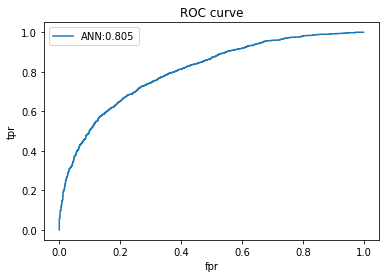

In [19]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
def knn_load_data(poly_name,file_dir='../data/'):
    file_path_pos = file_dir+poly_name+'.txt'
    file_path_neg = file_dir+'neg'+poly_name+'.txt'
    base2num={
    'A':0,'T':1,'C':2,'G':3,
    'a':0,'t':1,'c':2,'g':3
    }
    
    pdata = np.loadtxt(file_path_pos,dtype='str')
    pdata = [seq[:100]+seq[106:] for seq in pdata]
    pdata = [[base2num[base] for base in seq] for seq in pdata]
                   
    ndata = np.loadtxt(file_path_neg,dtype='str')
    ndata = [seq[:100]+seq[106:] for seq in ndata]
    ndata = [[base2num[base] for base in seq] for seq in ndata]
    
    X = np.array(pdata+ndata)
    y = np.append(np.ones(len(pdata)),np.zeros(len(ndata)))
    
    return X,y

def model_assess(y_true,y_prob,roc=True,pr=False,poly_name=None,line_name=None):
    '''
    pass
    '''
    re={}
    y_true = np.array(y_true,dtype=int)
    y_pred = np.array(y_prob+0.5,dtype=int)
    
    re['accuracy'] = round(metrics.accuracy_score  (y_true,y_pred),3)
    re['precision'] = round(metrics.precision_score(y_true,y_pred),3)
    re['recall'] = round(metrics.recall_score      (y_true,y_pred),3)
    re['f1'] =  round(metrics.f1_score             (y_true,y_pred),3)
    re['auc'] = round(metrics.roc_auc_score        (y_true, y_prob),3)
    
    
    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_prob)
    plt.plot(fpr,tpr,label= 'ANN:'+str(re['auc']))
    plt.title('ROC curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    
    #precision, recall, thresholds = metrics.precision_recall_curve(y_true,y_prob)
    #plt.plot(precision,recall,label='precison_and_recall')
    plt.legend()
    
    return re

#load and split all data
polys="AATAGA AATATA CATAAA GATAAA AGTAAA ACTAAA TATAAA AATACA AAAAAG AAGAAA ATTAAA AATAAA".split(" ")
X,y=[],[]
for index,poly in enumerate(polys):
    X_sub,y_sub = knn_load_data(poly)
    if(index == 0):
        X,y = X_sub,y_sub
    else:
        X,y = np.concatenate((X,X_sub)),np.concatenate((y,y_sub))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)


    #build and train model
    from keras import Sequential
    from keras.layers import Dense,Dropout
    from keras.optimizers import Adam
    input_shape = (200,)
    model = Sequential()
    model.add(Dense(128,activation='relu',input_shape=input_shape))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))
    adam=Adam(lr=1*1e-4)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])    

    from keras.callbacks import EarlyStopping,TensorBoard
    early_stopping = EarlyStopping(monitor='val_accuracy',patience=50,min_delta=0,verbose=1,mode='auto')
    tensorB=TensorBoard(log_dir='./logs', histogram_freq=1)
    callback_list=[early_stopping]

    model.fit(X_train,y_train,validation_split=0.2,epochs=200,verbose=0,callbacks=callback_list)
    pred_prob = model.predict_proba(X_test)
    model_assess(y_test,pred_prob)

0 AATAGA {'accuracy': 0.73, 'precision': 0.743, 'recall': 0.703, 'f1': 0.722, 'auc': 0.839}
1 AATATA {'accuracy': 0.756, 'precision': 0.867, 'recall': 0.619, 'f1': 0.722, 'auc': 0.885}
2 CATAAA {'accuracy': 0.598, 'precision': 0.588, 'recall': 0.714, 'f1': 0.645, 'auc': 0.625}
3 GATAAA {'accuracy': 0.739, 'precision': 0.681, 'recall': 0.78, 'f1': 0.727, 'auc': 0.824}
4 AGTAAA {'accuracy': 0.634, 'precision': 0.64, 'recall': 0.686, 'f1': 0.662, 'auc': 0.723}
5 ACTAAA {'accuracy': 0.739, 'precision': 0.746, 'recall': 0.725, 'f1': 0.735, 'auc': 0.791}
6 TATAAA {'accuracy': 0.686, 'precision': 0.724, 'recall': 0.716, 'f1': 0.72, 'auc': 0.769}
7 AATACA {'accuracy': 0.761, 'precision': 0.753, 'recall': 0.802, 'f1': 0.777, 'auc': 0.852}
8 AAAAAG {'accuracy': 0.858, 'precision': 0.907, 'recall': 0.795, 'f1': 0.847, 'auc': 0.934}
9 AAGAAA {'accuracy': 0.708, 'precision': 0.702, 'recall': 0.762, 'f1': 0.731, 'auc': 0.8}
10 ATTAAA {'accuracy': 0.712, 'precision': 0.76, 'recall': 0.642, 'f1': 0.69

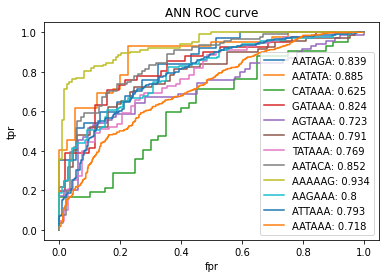

In [33]:
# work on 12 polys separately
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
def ann_load_data(poly_name,file_dir='../data/'):
    file_path_pos = file_dir+poly_name+'.txt'
    file_path_neg = file_dir+'neg'+poly_name+'.txt'
    base2num={
    'A':4,'T':3,'C':2,'G':1,
    'a':3,'t':2,'c':2,'g':.3    }
    
    pdata = np.loadtxt(file_path_pos,dtype='str')
    pdata = [seq[:100]+seq[106:] for seq in pdata]
    pdata = [[base2num[base] for base in seq] for seq in pdata]
                   
    ndata = np.loadtxt(file_path_neg,dtype='str')
    ndata = [seq[:100]+seq[106:] for seq in ndata]
    ndata = [[base2num[base] for base in seq] for seq in ndata]
    
    X = np.array(pdata+ndata)
    y = np.append(np.ones(len(pdata)),np.zeros(len(ndata)))
    
    return X,y

def model_assess(y_true,y_prob,roc=True,pr=False,poly_name=None,line_name=None):
    '''
    pass
    '''
    re={}
    y_true = np.array(y_true,dtype=int)
    y_pred = np.array(y_prob+0.5,dtype=int)
    
    re['accuracy'] = round(metrics.accuracy_score  (y_true,y_pred),3)
    re['precision'] = round(metrics.precision_score(y_true,y_pred),3)
    re['recall'] = round(metrics.recall_score      (y_true,y_pred),3)
    re['f1'] =  round(metrics.f1_score             (y_true,y_pred),3)
    re['auc'] = round(metrics.roc_auc_score        (y_true, y_prob),3)
    
    
    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_prob)
    plt.plot(fpr,tpr,label= poly_name+': '+str(re['auc']))
    plt.title('ANN ROC curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    
    #precision, recall, thresholds = metrics.precision_recall_curve(y_true,y_prob)
    #plt.plot(precision,recall,label='precison_and_recall')
    plt.legend()
    
    return re

#load and split all data
import multiprocessing
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,TensorBoard
import matplotlib.pyplot as plt
polys="AATAGA AATATA CATAAA GATAAA AGTAAA ACTAAA TATAAA AATACA AAAAAG AAGAAA ATTAAA AATAAA".split(" ")

re = []
for index,poly in enumerate(polys):
    X,y = ann_load_data(poly)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

    #build and train model
    def work(X_train,X_test,y_train,y_test,child_conn):
        input_shape = (200,)
        model = Sequential()
        model.add(Dense(256,activation='relu',input_shape=input_shape))
        model.add(Dense(256,activation='relu',input_shape=input_shape))
        model.add(Dropout(0.5))
        model.add(Dense(1,activation='sigmoid'))
        adam=Adam(lr=1*1e-3)
        model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])    

        early_stopping = EarlyStopping(monitor='val_loss',patience=20,min_delta=0,verbose=0,mode='auto')
        callback_list=[early_stopping]
        hist = model.fit(X_train,y_train,validation_split=0.25,epochs=200,verbose=0,callbacks=callback_list)
        pred_prob = model.predict(X_test)
        child_conn.send([y_test,pred_prob])
        
    parent_conn, child_conn = multiprocessing.Pipe()
    p = multiprocessing.Process(target=work,args=(X_train,X_test,y_train,y_test,child_conn))
    p.start()
    y_test,pred_prob = parent_conn.recv()
    re.append((y_test,pred_prob))
    print(index,poly,model_assess(y_test,pred_prob,poly_name=poly))
    p.join()


0 AATAGA {'accuracy': 0.838, 'precision': 0.821, 'recall': 0.865, 'f1': 0.842, 'auc': 0.916}
1 AATATA {'accuracy': 0.744, 'precision': 0.784, 'recall': 0.69, 'f1': 0.734, 'auc': 0.838}
2 CATAAA {'accuracy': 0.683, 'precision': 0.767, 'recall': 0.548, 'f1': 0.639, 'auc': 0.775}
3 GATAAA {'accuracy': 0.717, 'precision': 0.66, 'recall': 0.756, 'f1': 0.705, 'auc': 0.847}
4 AGTAAA {'accuracy': 0.709, 'precision': 0.696, 'recall': 0.786, 'f1': 0.738, 'auc': 0.794}
5 ACTAAA {'accuracy': 0.717, 'precision': 0.703, 'recall': 0.754, 'f1': 0.727, 'auc': 0.815}
6 TATAAA {'accuracy': 0.692, 'precision': 0.727, 'recall': 0.727, 'f1': 0.727, 'auc': 0.795}
7 AATACA {'accuracy': 0.807, 'precision': 0.794, 'recall': 0.846, 'f1': 0.819, 'auc': 0.865}
8 AAAAAG {'accuracy': 0.858, 'precision': 0.878, 'recall': 0.828, 'f1': 0.852, 'auc': 0.929}
9 AAGAAA {'accuracy': 0.772, 'precision': 0.774, 'recall': 0.792, 'f1': 0.783, 'auc': 0.846}
10 ATTAAA {'accuracy': 0.758, 'precision': 0.764, 'recall': 0.764, 'f1':

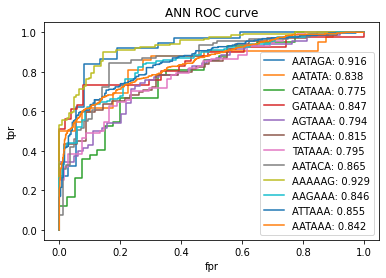

In [3]:
# try k-mer
# try 2-mer
# work on 12 polys separately
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
def ann_load_data(poly_name,file_dir='../data/'):
    file_path_pos = file_dir+poly_name+'.txt'
    file_path_neg = file_dir+'neg'+poly_name+'.txt'
    
    k=2
    
    pdata = np.loadtxt(file_path_pos,dtype='str')
    pdata = [seq[:100]+seq[106:] for seq in pdata]
    pdata = [[seq[i:i+k]for i in range(200-k+1)]for seq in pdata]
                   
    ndata = np.loadtxt(file_path_neg,dtype='str')
    ndata = [seq[:100]+seq[106:] for seq in ndata]
    ndata = [[seq[i:i+k]for i in range(200-k+1)] for seq in ndata]
    
    k_mer2num={}
    for seq in pdata:
        for k_mer in seq:
            k_mer2num[k_mer]=0
    for seq in ndata:
        for k_mer in seq:
            k_mer2num[k_mer]=0
            
    for index,k_mer in enumerate(sorted(k_mer2num.keys())):
        k_mer2num[k_mer] = index
        
    pdata = [[k_mer2num[k_mer] for k_mer in seq]for seq in pdata]
    ndata = [[k_mer2num[k_mer] for k_mer in seq]for seq in ndata]
    X = np.array(pdata+ndata)
    y = np.append(np.ones(len(pdata)),np.zeros(len(ndata)))
    
    return X,y

def model_assess(y_true,y_prob,roc=True,pr=False,poly_name=None,line_name=None):
    '''
    pass
    '''
    re={}
    y_true = np.array(y_true,dtype=int)
    y_pred = np.array(y_prob+0.5,dtype=int)
    
    re['accuracy'] = round(metrics.accuracy_score  (y_true,y_pred),3)
    re['precision'] = round(metrics.precision_score(y_true,y_pred),3)
    re['recall'] = round(metrics.recall_score      (y_true,y_pred),3)
    re['f1'] =  round(metrics.f1_score             (y_true,y_pred),3)
    re['auc'] = round(metrics.roc_auc_score        (y_true, y_prob),3)
    
    
    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_prob)
    plt.plot(fpr,tpr,label= poly_name+': '+str(re['auc']))
    plt.title('ANN ROC curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    
    #precision, recall, thresholds = metrics.precision_recall_curve(y_true,y_prob)
    #plt.plot(precision,recall,label='precison_and_recall')
    plt.legend()
    
    return re

#load and split all data
import multiprocessing
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,TensorBoard
import matplotlib.pyplot as plt
polys="AATAGA AATATA CATAAA GATAAA AGTAAA ACTAAA TATAAA AATACA AAAAAG AAGAAA ATTAAA AATAAA".split(" ")

re = []
for index,poly in enumerate(polys):
    X,y = ann_load_data(poly)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

    #build and train model
    def work(X_train,X_test,y_train,y_test,child_conn):
        input_shape = (199,)
        model = Sequential()
        model.add(Dense(256,activation='relu',input_shape=input_shape))
        model.add(Dense(256,activation='relu',input_shape=input_shape))
        model.add(Dropout(0.5))
        model.add(Dense(1,activation='sigmoid'))
        adam=Adam(lr=1*1e-3)
        model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])    

        early_stopping = EarlyStopping(monitor='val_loss',patience=20,min_delta=0,verbose=0,mode='auto')
        callback_list=[early_stopping]
        hist = model.fit(X_train,y_train,validation_split=0.25,epochs=200,verbose=0,callbacks=callback_list)
        pred_prob = model.predict(X_test)
        child_conn.send([y_test,pred_prob])
        
    parent_conn, child_conn = multiprocessing.Pipe()
    p = multiprocessing.Process(target=work,args=(X_train,X_test,y_train,y_test,child_conn))
    p.start()
    y_test,pred_prob = parent_conn.recv()
    re.append((y_test,pred_prob))
    print(index,poly,model_assess(y_test,pred_prob,poly_name=poly))
    p.join()


0 AATAGA {'accuracy': 0.784, 'precision': 0.769, 'recall': 0.811, 'f1': 0.789, 'auc': 0.858}
1 AATATA {'accuracy': 0.78, 'precision': 0.875, 'recall': 0.667, 'f1': 0.757, 'auc': 0.849}
2 CATAAA {'accuracy': 0.622, 'precision': 0.628, 'recall': 0.643, 'f1': 0.635, 'auc': 0.726}
3 GATAAA {'accuracy': 0.804, 'precision': 0.767, 'recall': 0.805, 'f1': 0.786, 'auc': 0.837}
4 AGTAAA {'accuracy': 0.657, 'precision': 0.658, 'recall': 0.714, 'f1': 0.685, 'auc': 0.69}
5 ACTAAA {'accuracy': 0.732, 'precision': 0.742, 'recall': 0.71, 'f1': 0.726, 'auc': 0.811}
6 TATAAA {'accuracy': 0.756, 'precision': 0.76, 'recall': 0.83, 'f1': 0.793, 'auc': 0.825}
7 AATACA {'accuracy': 0.739, 'precision': 0.718, 'recall': 0.813, 'f1': 0.763, 'auc': 0.858}
8 AAAAAG {'accuracy': 0.866, 'precision': 0.868, 'recall': 0.861, 'f1': 0.864, 'auc': 0.937}
9 AAGAAA {'accuracy': 0.772, 'precision': 0.823, 'recall': 0.715, 'f1': 0.765, 'auc': 0.838}
10 ATTAAA {'accuracy': 0.765, 'precision': 0.755, 'recall': 0.801, 'f1': 0.

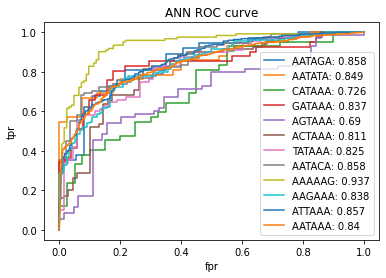

In [5]:
# try k-mer
# try 3-mer
# work on 12 polys separately
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
def ann_load_data(poly_name,file_dir='../data/'):
    file_path_pos = file_dir+poly_name+'.txt'
    file_path_neg = file_dir+'neg'+poly_name+'.txt'
    
    k=3
    pdata = np.loadtxt(file_path_pos,dtype='str')
    pdata = [seq[:100]+seq[106:] for seq in pdata]
    pdata = [[seq[i:i+k]for i in range(200-k+1)]for seq in pdata]
                   
    ndata = np.loadtxt(file_path_neg,dtype='str')
    ndata = [seq[:100]+seq[106:] for seq in ndata]
    ndata = [[seq[i:i+k]for i in range(200-k+1)] for seq in ndata]
    
    k_mer2num={}
    for seq in pdata:
        for k_mer in seq:
            k_mer2num[k_mer]=0
    for seq in ndata:
        for k_mer in seq:
            k_mer2num[k_mer]=0
            
    for index,k_mer in enumerate(sorted(k_mer2num.keys())):
        k_mer2num[k_mer] = index
        
    pdata = [[k_mer2num[k_mer] for k_mer in seq]for seq in pdata]
    ndata = [[k_mer2num[k_mer] for k_mer in seq]for seq in ndata]
    X = np.array(pdata+ndata)
    y = np.append(np.ones(len(pdata)),np.zeros(len(ndata)))
    
    return X,y

def model_assess(y_true,y_prob,roc=True,pr=False,poly_name=None,line_name=None):
    '''
    pass
    '''
    re={}
    y_true = np.array(y_true,dtype=int)
    y_pred = np.array(y_prob+0.5,dtype=int)
    
    re['accuracy'] = round(metrics.accuracy_score  (y_true,y_pred),3)
    re['precision'] = round(metrics.precision_score(y_true,y_pred),3)
    re['recall'] = round(metrics.recall_score      (y_true,y_pred),3)
    re['f1'] =  round(metrics.f1_score             (y_true,y_pred),3)
    re['auc'] = round(metrics.roc_auc_score        (y_true, y_prob),3)
    
    
    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_prob)
    plt.plot(fpr,tpr,label= poly_name+': '+str(re['auc']))
    plt.title('ANN ROC curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    
    #precision, recall, thresholds = metrics.precision_recall_curve(y_true,y_prob)
    #plt.plot(precision,recall,label='precison_and_recall')
    plt.legend()
    
    return re

#load and split all data
import multiprocessing
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,TensorBoard
import matplotlib.pyplot as plt
polys="AATAGA AATATA CATAAA GATAAA AGTAAA ACTAAA TATAAA AATACA AAAAAG AAGAAA ATTAAA AATAAA".split(" ")

re = []
for index,poly in enumerate(polys):
    X,y = ann_load_data(poly)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)
    #build and train model
    def work(X_train,X_test,y_train,y_test,child_conn):
        input_shape = (198,)
        model = Sequential()
        model.add(Dense(256,activation='relu',input_shape=input_shape))
        model.add(Dense(256,activation='relu',input_shape=input_shape))
        model.add(Dropout(0.5))
        model.add(Dense(1,activation='sigmoid'))
        adam=Adam(lr=1*1e-3)
        model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])    

        early_stopping = EarlyStopping(monitor='val_loss',patience=20,min_delta=0,verbose=0,mode='auto')
        callback_list=[early_stopping]
        hist = model.fit(X_train,y_train,validation_split=0.25,epochs=200,verbose=0,callbacks=callback_list)
        pred_prob = model.predict(X_test)
        child_conn.send([y_test,pred_prob])
        
    parent_conn, child_conn = multiprocessing.Pipe()
    p = multiprocessing.Process(target=work,args=(X_train,X_test,y_train,y_test,child_conn))
    p.start()
    y_test,pred_prob = parent_conn.recv()
    re.append((y_test,pred_prob))
    print(index,poly,model_assess(y_test,pred_prob,poly_name=poly))
    p.join()


Epoch 00125: early stopping
Instructions for updating:
Please use `model.predict()` instead.


{'accuracy': 0.807,
 'precision': 0.847,
 'recall': 0.752,
 'f1': 0.797,
 'auc': 0.893}

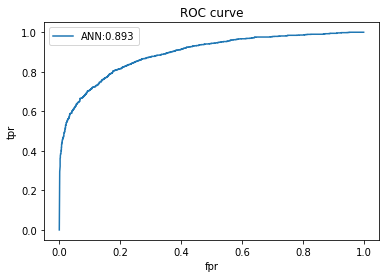

In [7]:
#try all data 
#k-mer
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
def ann_load_data(poly_name,file_dir='../data/'):
    file_path_pos = file_dir+poly_name+'.txt'
    file_path_neg = file_dir+'neg'+poly_name+'.txt'
    
    k=2
    pdata = np.loadtxt(file_path_pos,dtype='str')
    pdata = [seq[:100]+seq[106:] for seq in pdata]
    pdata = [[seq[i:i+k]for i in range(200-k+1)]for seq in pdata]
                   
    ndata = np.loadtxt(file_path_neg,dtype='str')
    ndata = [seq[:100]+seq[106:] for seq in ndata]
    ndata = [[seq[i:i+k]for i in range(200-k+1)] for seq in ndata]
    
    k_mer2num={}
    for seq in pdata:
        for k_mer in seq:
            k_mer2num[k_mer]=0
    for seq in ndata:
        for k_mer in seq:
            k_mer2num[k_mer]=0
            
    for index,k_mer in enumerate(sorted(k_mer2num.keys())):
        k_mer2num[k_mer] = index
        
    pdata = [[k_mer2num[k_mer] for k_mer in seq]for seq in pdata]
    ndata = [[k_mer2num[k_mer] for k_mer in seq]for seq in ndata]
    X = np.array(pdata+ndata)
    y = np.append(np.ones(len(pdata)),np.zeros(len(ndata)))
    
    return X,y
def model_assess(y_true,y_prob,roc=True,pr=False,poly_name=None,line_name=None):
    '''
    pass
    '''
    re={}
    y_true = np.array(y_true,dtype=int)
    y_pred = np.array(y_prob+0.5,dtype=int)
    
    re['accuracy'] = round(metrics.accuracy_score  (y_true,y_pred),3)
    re['precision'] = round(metrics.precision_score(y_true,y_pred),3)
    re['recall'] = round(metrics.recall_score      (y_true,y_pred),3)
    re['f1'] =  round(metrics.f1_score             (y_true,y_pred),3)
    re['auc'] = round(metrics.roc_auc_score        (y_true, y_prob),3)
    
    
    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_prob)
    plt.plot(fpr,tpr,label= 'ANN:'+str(re['auc']))
    plt.title('ROC curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    
    #precision, recall, thresholds = metrics.precision_recall_curve(y_true,y_prob)
    #plt.plot(precision,recall,label='precison_and_recall')
    plt.legend()
    
    return re

#load and split all data
polys="AATAGA AATATA CATAAA GATAAA AGTAAA ACTAAA TATAAA AATACA AAAAAG AAGAAA ATTAAA AATAAA".split(" ")
X,y=[],[]
for index,poly in enumerate(polys):
    X_sub,y_sub = ann_load_data(poly)
    if(index == 0):
        X,y = X_sub,y_sub
    else:
        X,y = np.concatenate((X,X_sub)),np.concatenate((y,y_sub))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)


#build and train model
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
input_shape = (199,)
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=input_shape))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
adam=Adam(lr=1*1e-4)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])    

from keras.callbacks import EarlyStopping,TensorBoard
early_stopping = EarlyStopping(monitor='val_accuracy',patience=50,min_delta=0,verbose=1,mode='auto')
tensorB=TensorBoard(log_dir='./logs', histogram_freq=1)
callback_list=[early_stopping]

model.fit(X_train,y_train,validation_split=0.2,epochs=200,verbose=0,callbacks=callback_list)
pred_prob = model.predict_proba(X_test)
model_assess(y_test,pred_prob)